In [177]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as ss

In [178]:
df = pd.read_csv(r'C:\Users\aakan\Desktop\Forecast\laundry_data.csv')
df.head()

avail   avg_runtime                    datetime     id   machine_no  \
0  Available            60  2021-03-06 16:21:11.280663  66555          2.0   
1  Available            60  2021-03-06 16:21:11.280674  66554          1.0   
2  Available            60  2021-03-06 16:21:11.329655  66828          1.0   
3  Available            60  2021-03-06 16:21:11.329666  66829          2.0   
4  Available            60  2021-03-06 16:21:11.329670  66830          3.0   

    offline                           room   time_remaining  type  
0     False             111 BROWN ST RM106               35     W  
1     False             111 BROWN ST RM106               60     D  
2     False  125-127 WATERMAN STREET RM003               48     W  
3     False  125-127 WATERMAN STREET RM003               46     W  
4     False  125-127 WATERMAN STREET RM003               60     D

### Create a new column

Status codes:

* 0 - Busy (1 min remaining and so on)
* 1 - Available
* 2 - Ext. Cycle
* 3 - Offline
* 4 - Out of Service

In [3]:
df['status'] = 0 

df.loc[df['avail'] == 'Available', 'status'] = 1
df.loc[df['avail'] == 'Ext. Cycle', 'status'] = 2
df.loc[df['avail'] == 'Offline', 'status'] = 3
df.loc[df['avail'] == 'Out of Service', 'status'] = 4
#df['status'] = (df['avail'] == 'Available').astype(int)
df.head(1000)

avail   avg_runtime                    datetime     id   machine_no  \
0     Available            60  2021-03-06 16:21:11.280663  66555          2.0   
1     Available            60  2021-03-06 16:21:11.280674  66554          1.0   
2     Available            60  2021-03-06 16:21:11.329655  66828          1.0   
3     Available            60  2021-03-06 16:21:11.329666  66829          2.0   
4     Available            60  2021-03-06 16:21:11.329670  66830          3.0   
..          ...           ...                         ...    ...          ...   
995  Ext. Cycle            60  2021-03-06 16:22:51.461040  66671          8.0   
996     Offline            60  2021-03-06 16:22:51.521746  66533          5.0   
997     Offline            60  2021-03-06 16:22:51.521755  66534          6.0   
998     Offline            60  2021-03-06 16:22:51.521758  66535          7.0   
999     Offline            60  2021-03-06 16:22:51.521762  66529          1.0   

      offline                           room   time_remaining  type  status  
0       False             111 BROWN ST RM106               35     W       1  
1       False             111 BROWN ST RM106               60     D       1  
2       False  125-127 WATERMAN STREET RM003               48     W       1  
3       False  125-127 WATERMAN STREET RM003               46     W       1  
4       False  125-127 WATERMAN STREET RM003               60     D       1  
..        ...                            ...              ...   ...     ...  
995      True              NPEMBROKE 4 RM117                0     D       2  
996      True              OLNEY HOUSE RM024               60     W       3  
997      True              OLNEY HOUSE RM024               60     W       3  
998      True              OLNEY HOUSE RM024               60     W       3  
999      True              OLNEY HOUSE RM024               39     D       3  

[1000 rows x 10 columns]

In [71]:
plt.figure()

df[" time_remaining"].hist(by=df[' room'], alpha=0.5, figsize=(432, 288))
#plt.tight_layout()
#plt.show()
plt.savefig('foo.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [182]:
df1 = df.groupby(' room')
#df1 = df1.head()   
final_room = []
for name, group in df1:
 #  print(group[' time_remaining'])
    dismin=np.amin(group[' time_remaining'])
    dismax=np.amax(group[' time_remaining'])
    print(dismin, dismax)
    My_list = [*range(dismin, dismax+1, 1)]
    result = any(elem in group[' time_remaining'] for elem in My_list)
    print(result)
    if result==True:
        final_room.append(name)
 #  result =  all(elem in My_list for elem in group[' time_remaining'])
 #  print(result)
#df1 = pd.DataFrame(df1[' time_remaining'])
#or row in df1:
  # print(row[1][' time_remaining'])
#d.DataFrame(df1)

35 60
False
46 60
False
0 60
True
0 60
True
0 40
True
0 60
True
15 56
True
0 60
True
1 60
True
1 60
True
0 60
True
35 60
True
0 60
False
0 46
False
0 45
False
0 60
False
1 60
False
1 60
False
0 60
False
0 60
False
0 60
False
43 60
False
0 60
False
0 60
False
28 60
False
21 60
False
34 60
False
1 60
False
0 60
False
33 60
False
34 60
False
0 60
False
0 60
False
1 60
False
0 37
False
0 60
False
38 60
False
1 60
False
54 60
False
34 60
False
0 60
False
39 60
False
0 60
False
39 60
False
0 60
False
34 60
False
0 38
False
0 60
False
0 60
False
0 60
False
0 60
False
0 60
False
0 60
False
0 60
False
0 60
False
0 60
False
0 51
False
0 60
False


In [183]:
df2 = df[df[' room'].isin(final_room)]
df2

avail   avg_runtime                    datetime  \
6              Available            60  2021-03-06 16:21:11.395921   
7       30 min remaining            60  2021-03-06 16:21:11.395931   
8              Available            60  2021-03-06 16:21:11.395935   
9       38 min remaining            60  2021-03-06 16:21:11.395940   
10             Available            60  2021-03-06 16:21:11.447117   
...                  ...           ...                         ...   
300698           Offline            60  2021-03-07 02:16:22.270510   
300699           Offline            60  2021-03-07 02:16:22.270520   
300700           Offline            60  2021-03-07 02:16:22.270524   
300701           Offline            60  2021-03-07 02:16:22.270530   
300702           Offline            60  2021-03-07 02:16:22.270533   

                 id   machine_no   offline                room  \
6             66703          1.0     False       315 THAYER ST   
7             66704          2.0      True       315 THAYER ST   
8             66705          3.0     False       315 THAYER ST   
9             66706          4.0      True       315 THAYER ST   
10      10000025310          NaN     False     ANDREWS E RM154   
...             ...          ...       ...                 ...   
300698        66568          1.0      True  CHAPIN HOUSE RM023   
300699        66569          2.0      True  CHAPIN HOUSE RM023   
300700        66570          3.0      True  CHAPIN HOUSE RM023   
300701        66571          4.0      True  CHAPIN HOUSE RM023   
300702        66573          6.0      True  CHAPIN HOUSE RM023   

         time_remaining  type  
6                    53     W  
7                    30     W  
8                    39     D  
9                    38     D  
10                   60     D  
...                 ...   ...  
300698               36     W  
300699               36     W  
300700               35     W  
300701               60     D  
300702               60     D  

[61985 rows x 9 columns]

In [119]:
washers = df2[df2[' type']=='W']

In [122]:
plt.figure()

washers[" time_remaining"].hist(by=df[' room'], alpha=0.5, figsize=(400, 300))
plt.savefig('washers.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [124]:
dryers = df2[df2[' type']=='D']
plt.figure()

dryers[" time_remaining"].hist(by=df[' room'], alpha=0.5, figsize=(400, 300))
plt.savefig('dryers.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [186]:
df1 = df.groupby(' room')
#df1 = df1.head()   
final_room = []
for name, group in df1:
 #  print(group[' time_remaining'])
    dismin=np.amin(group[' time_remaining'])
    dismax=np.amax(group[' time_remaining'])
    print(dismin, dismax)
    My_list = [*range(dismin, dismax+1, 1)]
    time_list = group[' time_remaining']
    print('here')
    print(time_list)
    result = all(elem in My_list for elem in time_list)
    print(result)
 #   if result==True:
  #      final_room.append(name)
 #  result =  all(elem in My_list for elem in group[' time_remaining'])
 #  print(result)
#df1 = pd.DataFrame(df1[' time_remaining'])
#or row in df1:
  # print(row[1][' time_remaining'])
#d.DataFrame(df1)

35 60
here
0         35
1         60
267       35
268       60
534       35
          ..
300109    60
300375    35
300376    60
300642    35
300643    60
Name:  time_remaining, Length: 2254, dtype: int64
True
46 60
here
2         48
3         46
4         60
5         60
269       48
          ..
300380    60
300644    48
300645    46
300646    60
300647    60
Name:  time_remaining, Length: 4508, dtype: int64
True
0 60
here
6         53
7         30
8         39
9         38
273       53
          ..
300384    38
300648    53
300649    60
300650    39
300651    38
Name:  time_remaining, Length: 4508, dtype: int64
True
0 60
here
10        60
11        60
12        60
13        60
14        60
          ..
300657    60
300658    34
300659    39
300660    60
300661     0
Name:  time_remaining, Length: 11270, dtype: int64
True
0 40
here
20         0
21        35
22        19
23        40
24        34
          ..
300663    35
300664    19
300665    40
300666    34
300667    37
Name:  time_

True
39 60
here
208       39
209       60
475       39
476       60
742       39
          ..
300317    60
300583    39
300584    60
300850    39
300851    60
Name:  time_remaining, Length: 2254, dtype: int64
True
0 60
here
210       36
211       37
212       38
213       29
214       21
          ..
300853    37
300854    38
300855    29
300856    60
300857    60
Name:  time_remaining, Length: 6762, dtype: int64
True
34 60
here
216       60
217       34
483       60
484       34
750       60
          ..
300325    34
300591    60
300592    34
300858    60
300859    34
Name:  time_remaining, Length: 2254, dtype: int64
True
0 38
here
218       37
219       38
220       27
485       37
486       38
          ..
300594    38
300595    27
300860    37
300861    38
300862    27
Name:  time_remaining, Length: 3381, dtype: int64
True
0 60
here
221        0
222       31
223       20
224       33
225       12
          ..
300866    33
300867    60
300868    60
300869    47
300870    60
Name:  t

In [231]:
df3 = df.groupby(' id')
#df3.head([5])
room_list = []
for row in df3:
#    print(row[1][' room'].iloc[0])
    time_list = list(row[1][' time_remaining'])
    dismin=np.amin(time_list)
    dismax=np.amax(time_list)
 #   print(dismin, dismax)
    if(abs(dismax-dismin)>30):
        My_list = [*range(dismin, dismax+1, 1)]
  #      print(My_list)
     #   result = all(elem in My_list for elem in time_list)
    #    print(row[0])
        if(all(elem in My_list for elem in time_list)):
            room_list.append((row[0],row[1][' room'].iloc[0]))
    else:
        result = False
  #  print(result)
print(len(set(df[' id'])))
print(len(room_list))

267
138


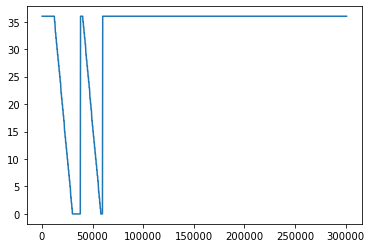

In [236]:
df2 = df[df[' id'].isin(room_list[0])]
plt.plot(df2[' time_remaining'])